In [5]:
# import sys
# !{sys.executable} -m pip install pybaseball

In [6]:
from pybaseball import statcast

statcast(start_dt="2019-06-24", end_dt="2019-06-25").columns

This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████████| 2/2 [00:09<00:00,  4.71s/it]


Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description',
       ...
       'batter_days_until_next_game', 'api_break_z_with_gravity',
       'api_break_x_arm', 'api_break_x_batter_in', 'arm_angle', 'attack_angle',
       'attack_direction', 'swing_path_tilt',
       'intercept_ball_minus_batter_pos_x_inches',
       'intercept_ball_minus_batter_pos_y_inches'],
      dtype='object', length=118)

In [10]:
from pybaseball import cache

cache.enable()

In [47]:
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
from pybaseball import statcast_batter
from pybaseball import statcast_pitcher_spin
import datetime
# playerid_lookup('kershaw', 'clayton')


In [36]:
def get_player_stats(first_name, second_name, start_dt='2008-04-01', end_dt = None, pitcher= False):
    if end_dt is None:   
        today = datetime.date.today()
        yesterday = today - datetime.timedelta(days=1)
        end_dt = str(yesterday)
    player_info = playerid_lookup(last=second_name, first=first_name)
    if player_info.empty:
        raise ValueError("Player not found")
    else:
        if pitcher:
            stats = statcast_pitcher(start_dt, end_dt, player_info.iloc[0]["key_mlbam"])
        else:
            stats = statcast_batter(start_dt, end_dt, player_info.iloc[0]["key_mlbam"])
        return stats
    

In [103]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=10)

pitcher_df= get_player_stats("Clayton", "Kershaw", str(yesterday),None, True)  #.groupby("pitch_type").release_speed.agg("median")
batter_df= get_player_stats("Mike", "Trout", str(yesterday),None, False)

Gathering Player Data
Gathering Player Data


In [104]:
pitcher_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SL,2025-09-07,85.3,1.48,6.21,"Kershaw, Clayton",656896,477132,double,hit_into_play,...,2.0,2.52,-0.39,0.39,57.9,12.232738,-3.118893,32.745940,34.438058,36.106229
1,SL,2025-09-07,83.0,1.84,6.20,"Kershaw, Clayton",683002,477132,single,hit_into_play,...,2.0,3.27,-0.68,-0.68,53.7,12.852921,-4.242045,30.026625,36.635643,41.509537
2,SL,2025-09-07,85.3,1.88,6.13,"Kershaw, Clayton",683002,477132,NaN,called_strike,...,2.0,2.63,-0.59,-0.59,53.2,NaN,NaN,NaN,NaN,NaN
3,FF,2025-09-07,88.3,1.69,6.06,"Kershaw, Clayton",683002,477132,NaN,ball,...,2.0,1.48,0.11,0.11,55.1,NaN,NaN,NaN,NaN,NaN
4,FF,2025-09-07,88.5,1.75,5.99,"Kershaw, Clayton",683002,477132,NaN,ball,...,2.0,1.35,0.17,0.17,54.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,SL,2025-09-02,85.2,1.39,6.22,"Kershaw, Clayton",693304,477132,NaN,foul,...,1.0,2.26,-0.48,0.48,57.8,15.420009,-2.328253,28.807730,31.686782,29.071913
162,CU,2025-09-02,71.4,1.18,6.39,"Kershaw, Clayton",693304,477132,NaN,ball,...,1.0,5.59,-0.28,0.28,65.1,NaN,NaN,NaN,NaN,NaN
163,SL,2025-09-02,85.7,1.66,6.23,"Kershaw, Clayton",669707,477132,double,hit_into_play,...,1.0,2.27,-0.35,0.35,54.1,15.970482,-10.356322,33.770668,38.493588,31.502605
164,SL,2025-09-02,86.3,1.61,6.13,"Kershaw, Clayton",669707,477132,NaN,foul,...,1.0,2.34,-0.60,0.60,53.2,37.962298,-8.206180,26.500332,32.607179,31.327098


In [57]:
# kershaw_stats = statcast_pitcher('2017-06-01', '2017-07-01', 477132)

In [56]:
# kershaw_stats

In [182]:
batter_df= get_player_stats("Mike", "Trout", '2017-06-01' ,None, False)

Gathering Player Data


In [171]:
batter_df[(batter_df['plate_x'] < 0) & (batter_df['description'] =="ball") ]['plate_x'].mean()


-0.5980000000000001

In [174]:
batter_df[(batter_df['plate_x'] > 0) & (batter_df['description'] =="ball") ]['plate_x'].mean()

0.9433333333333334

In [176]:
 batter_df["sz_top"].mean()

3.5805882352941176

In [177]:
 batter_df["sz_bot"].mean()

1.7647058823529411

In [183]:
len(batter_df)

15396

In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

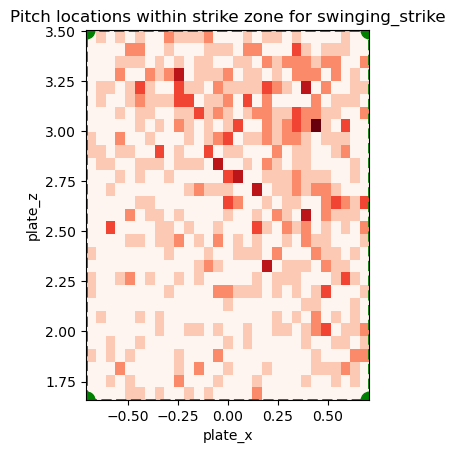

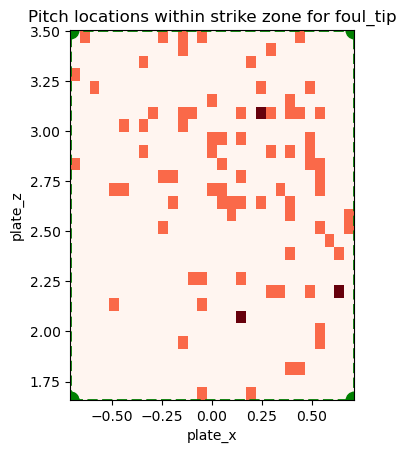

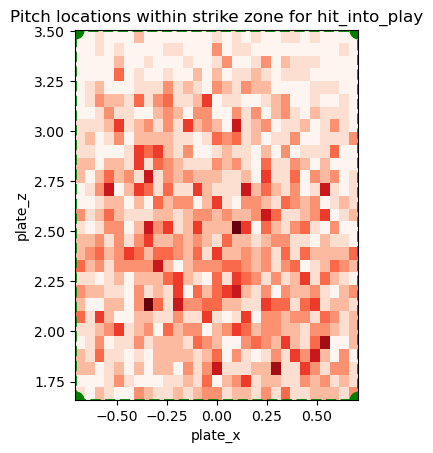

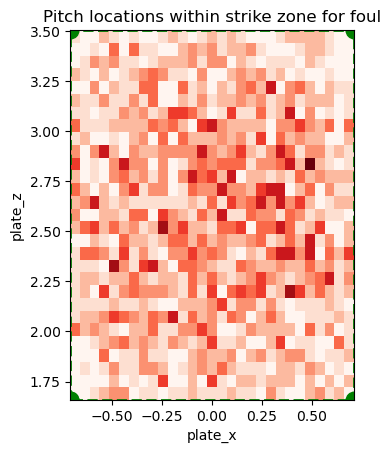

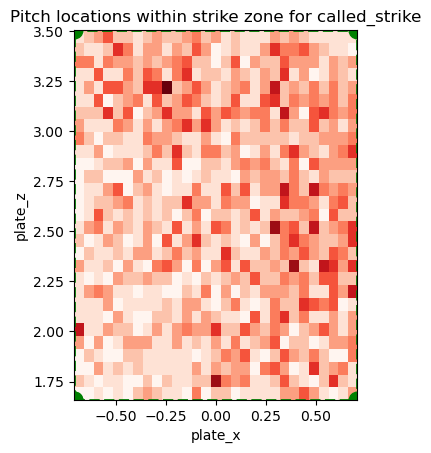

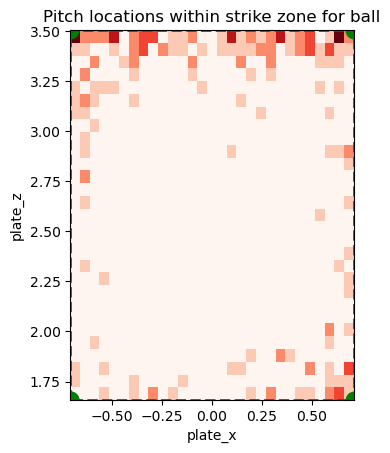

In [187]:


# Get the batters individual strike zone top and bottom (can vary so take the mean)
strikeZoneTop= batter_df["sz_top"].mean()
strikeZoneBottom= batter_df["sz_bot"].mean()




# Statcast calculates the x displacement relative to the center of catcher, not home plate, so take means from both sides
strikeZoneLeft= -0.708
strikeZoneRight= 0.708


# Filter ball pitches that are within  strike zone boundaries
in_zone = batter_df[
    (batter_df['plate_x'] <= strikeZoneRight) &
    (batter_df['plate_x'] >= strikeZoneLeft) &
    (batter_df['plate_z'] >= strikeZoneBottom) &
    (batter_df['plate_z'] <= strikeZoneTop)
]

# get ouctomes for every ball in the zone
for outcome in in_zone["description"].unique():
#     plt.scatter( in_zone[in_zone["description"] == outcome]["plate_x"],in_zone[in_zone["description"] == outcome]["plate_z"], label= outcome)

# plt.scatter( in_zone[in_zone["description"] == "hit_into_play"]["plate_x"],in_zone[in_zone["description"] == "hit_into_play"]["plate_z"], label= "hit_into_play")


    # Define grid bins over the strike zone 
    x_bins = np.linspace(strikeZoneLeft, strikeZoneRight, 30)
    z_bins = np.linspace(strikeZoneBottom, strikeZoneTop, 30)




    heatmap, xedges, zedges = np.histogram2d(
        in_zone[in_zone["description"] ==outcome]['plate_x'], in_zone[in_zone["description"] ==outcome]['plate_z'], bins=[x_bins, z_bins]
    )

    plt.imshow(
        heatmap.T,  # transpose so x-axis is horizontal
        extent=[strikeZoneLeft, strikeZoneRight, strikeZoneBottom, strikeZoneTop],
        origin='lower',
        cmap='Reds',
        interpolation='nearest',
        aspect='auto'
    )



    # Overlay strike zone boundary
    plt.plot(
        [strikeZoneLeft, strikeZoneLeft, strikeZoneRight, strikeZoneRight, strikeZoneLeft],
        [strikeZoneBottom, strikeZoneTop, strikeZoneTop, strikeZoneBottom, strikeZoneBottom],
        color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12
    )




    plt.xlabel("plate_x")
    plt.ylabel("plate_z")
    plt.title("Pitch locations within strike zone for " + outcome)
    plt.gca().set_aspect(1, adjustable='box')
    # plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
    plt.show()


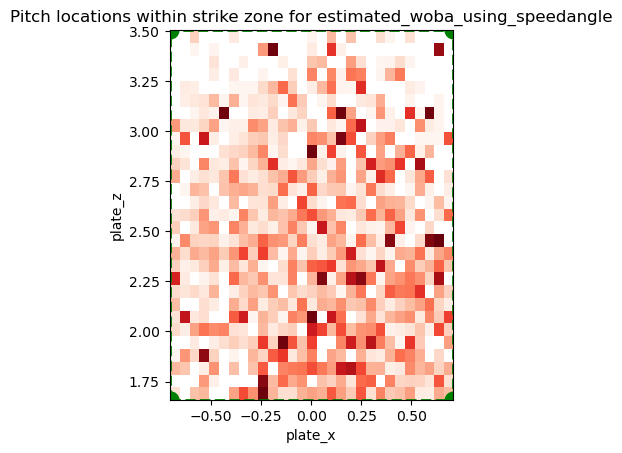

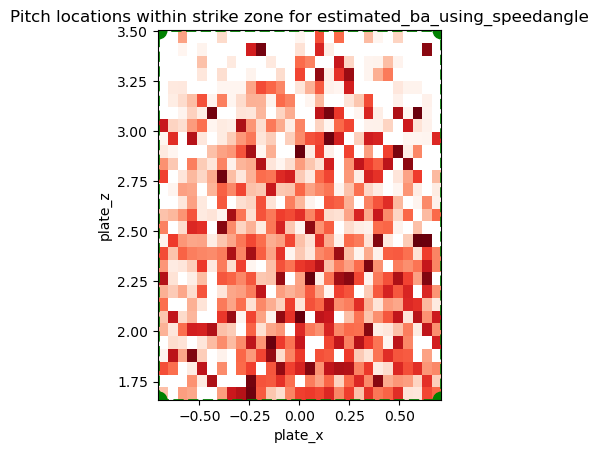

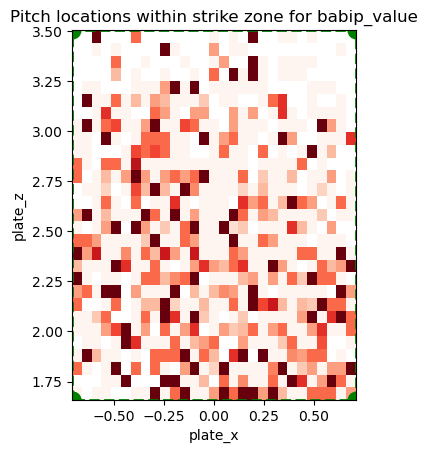

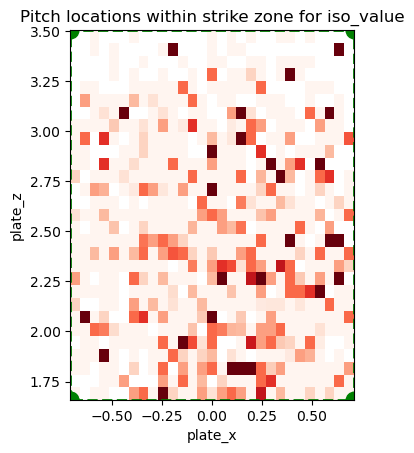

In [194]:


# Get the batters individual strike zone top and bottom (can vary so take the mean)
strikeZoneTop= batter_df["sz_top"].mean()
strikeZoneBottom= batter_df["sz_bot"].mean()




# Statcast calculates the x displacement relative to the center of catcher, not home plate, so take means from both sides
strikeZoneLeft= -0.708
strikeZoneRight= 0.708


# Filter ball pitches that are within  strike zone boundaries
in_zone = batter_df[
    (batter_df['plate_x'] <= strikeZoneRight) &
    (batter_df['plate_x'] >= strikeZoneLeft) &
    (batter_df['plate_z'] >= strikeZoneBottom) &
    (batter_df['plate_z'] <= strikeZoneTop)
]

stats= ['estimated_woba_using_speedangle', 'estimated_ba_using_speedangle', 'babip_value', 'iso_value']

# get ouctomes for every ball in the zone
for stat in stats:
#     plt.scatter( in_zone[in_zone["description"] == outcome]["plate_x"],in_zone[in_zone["description"] == outcome]["plate_z"], label= outcome)

# plt.scatter( in_zone[in_zone["description"] == "hit_into_play"]["plate_x"],in_zone[in_zone["description"] == "hit_into_play"]["plate_z"], label= "hit_into_play")


    # Define grid bins over the strike zone 
    x_bins = np.linspace(strikeZoneLeft, strikeZoneRight, 30)
    z_bins = np.linspace(strikeZoneBottom, strikeZoneTop, 30)
    
    
    # Assign a bin index to each pitch location, to aggregate over later
    subset = in_zone[in_zone['description'] == "hit_into_play"].copy() 
    subset['x_bin'] = pd.cut(subset.copy()['plate_x'], bins=x_bins, labels=False)
    subset['z_bin'] = pd.cut(subset['plate_z'], bins=z_bins, labels=False)
    
    
    # create the heatmap, making every bin null initially
    heatmap = np.full((len(z_bins)-1, len(x_bins)-1), np.nan)
    
    
    for i in range(len(x_bins)-1):
        for j in range(len(z_bins)-1):
            # Filter pitches in the current bin by stat
            bin_data = subset[(subset['x_bin'] == i) & (subset['z_bin'] == j)][stat]
            if not bin_data.empty:
                heatmap[j, i] = bin_data.mean() # plot the mena of data within the bin on the heatmap 



    plt.imshow(
        heatmap,  # transpose so x-axis is horizontal
        extent=[strikeZoneLeft, strikeZoneRight, strikeZoneBottom, strikeZoneTop],
        origin='lower',
        cmap='Reds',
        interpolation='nearest',
        aspect='auto'
    )



    # Overlay strike zone boundary
    plt.plot(
        [strikeZoneLeft, strikeZoneLeft, strikeZoneRight, strikeZoneRight, strikeZoneLeft],
        [strikeZoneBottom, strikeZoneTop, strikeZoneTop, strikeZoneBottom, strikeZoneBottom],
        color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12
    )




    plt.xlabel("plate_x")
    plt.ylabel("plate_z")
    plt.title("Pitch locations within strike zone for " + stat)
    plt.gca().set_aspect(1, adjustable='box')
    # plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
    plt.show()


In [165]:
print(in_zone[in_zone["description"] == "hit_into_play"].columns.tolist())

['pitch_type', 'game_date', 'release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher', 'events', 'description', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'launch_speed_a

3.613294117647059